Perform a KNN analysis on Wine Quality train by using k-fold crossvalidation.

Choose a k for k-fold crossvalidation.

Make the plot of RMSE based on train train and cross-validation as a function of 1/K (K of KNN).

You can pre-select the most promising features to use in the KNN with the aim to improve the prediction accureacy. But be careful to the crossvalidation strategy to use..  


In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


#load the train
train = pd.read_csv('wineq_train.csv')
val = pd.read_csv('/Users/kaanhacihaliloglu/padova/wineq_validation.csv')





In [67]:
# Check for missing values
print(train.isnull().sum())

# Assuming no significant missing values or that they are handled, let's proceed
# Normalize the feature columns
scaler = StandardScaler()
target = train['quality']
train = train.drop('quality', axis=1) 
train_scaled = scaler.fit_transform(train)



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [35]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3693,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
3694,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
3695,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
3696,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6


##### NEED TO SELECT FEATURES




In [73]:
#train['acid_alcohol_interaction'] = train['fixed acidity'] * train['alcohol']

#train['density_react'] = train['density'] / train['residual sugar']

#drop list of features
drop_list = []
features = train.columns
train = train.drop(drop_list, axis=1)



#variance of the quality column
var_q = target.var()
n = len(train)

#TSS
tss = var_q * n  

iterations = len(features) - 1

knn = KNeighborsRegressor(n_neighbors=30)

aic_scores= []
bic_scores=[]
adj_r2_scores=[]
rss_scores = []



def backward_selection(features):
    
    models_features = []
    best_model = None
    
    for _ in range(iterations):
            
        best_rss = 10**10
        best_features = []
        best_aic = 10**10
        bic_scores = 10**10
        adj_r2_scores = 0
        
        for f in features:
            new_features = features.drop(f)
            
            data = train[new_features]
            data = scaler.fit_transform(data)
            
            #print(f"shape of data. {data.shape}, shape of target {target.shape}")
            model = knn.fit(data, target) 
            
            
            y_pred = model.predict(data)
            #RS
            residuals = target - y_pred
            rss = np.sum(residuals**2)         
            
            C_p = 1/n * (rss + 2*len(features)*var_q)
            #AIC
            aic = C_p/(var_q)
            bic = 1/(n*var_q) * (rss + np.log(n)*len(features)*var_q)
            adj_r2 = 1 - (rss/ (n-len(features)-1)/(tss/(n-1)))
            
            
            if rss < best_rss:
                best_rss = rss
                best_features = new_features
                
                aic_scores.append(aic)
                bic_scores.append(bic)
                adj_r2_scores.append(adj_r2)
                rss_scores.append(rss)
                
                
            
            
                
            
                
        features = best_features
        models_features.append(best_features)
        print(rss_scores)
    return models_features
    
    
        

models = backward_selection(features)
      
    
        
        
        
        
        
        
        
        
        
    




[1742.2944444444443]
[1742.2944444444443, 1816.39, 1747.8466666666668, 1737.0755555555556, 1732.56, 1728.9233333333332]
[1742.2944444444443, 1816.39, 1747.8466666666668, 1737.0755555555556, 1732.56, 1728.9233333333332, 1833.8044444444445, 1746.5988888888887, 1744.4522222222222, 1741.2477777777776, 1734.8044444444445]
[1742.2944444444443, 1816.39, 1747.8466666666668, 1737.0755555555556, 1732.56, 1728.9233333333332, 1833.8044444444445, 1746.5988888888887, 1744.4522222222222, 1741.2477777777776, 1734.8044444444445, 1836.44, 1744.7122222222222, 1734.411111111111]
[1742.2944444444443, 1816.39, 1747.8466666666668, 1737.0755555555556, 1732.56, 1728.9233333333332, 1833.8044444444445, 1746.5988888888887, 1744.4522222222222, 1741.2477777777776, 1734.8044444444445, 1836.44, 1744.7122222222222, 1734.411111111111, 1846.792222222222, 1740.161111111111]
[1742.2944444444443, 1816.39, 1747.8466666666668, 1737.0755555555556, 1732.56, 1728.9233333333332, 1833.8044444444445, 1746.5988888888887, 1744.45222

In [75]:
for m in models :
    print(m)

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')
Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'alcohol'],
      dtype='object')
Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'alcohol'],
      dtype='object')
Index(['volatile acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'alcohol'],
      dtype='object')
Index(['volatile acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'pH', 'alcohol'],
      dtype='object')
Index(['volatile acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')
Index(['volatile acidity

In [77]:
len(rss_scores)

28

In [28]:
features.drop('quality')

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)



k_values = range(1, 101, 5)  # K values for KNN
training_rmse = []
cv_rmse = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Cross-validation scores
    cv_scores = cross_val_score(knn, features_scaled, target, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse.append(np.sqrt(-cv_scores.mean()))
    
    # Training RMSE
    knn.fit(features_scaled, target)
    predictions = knn.predict(features_scaled)
    training_rmse.append(np.sqrt(mean_squared_error(target, predictions)))
    

# Convert 1/K values for plotting
inverse_k_values = [1/k for k in k_values]



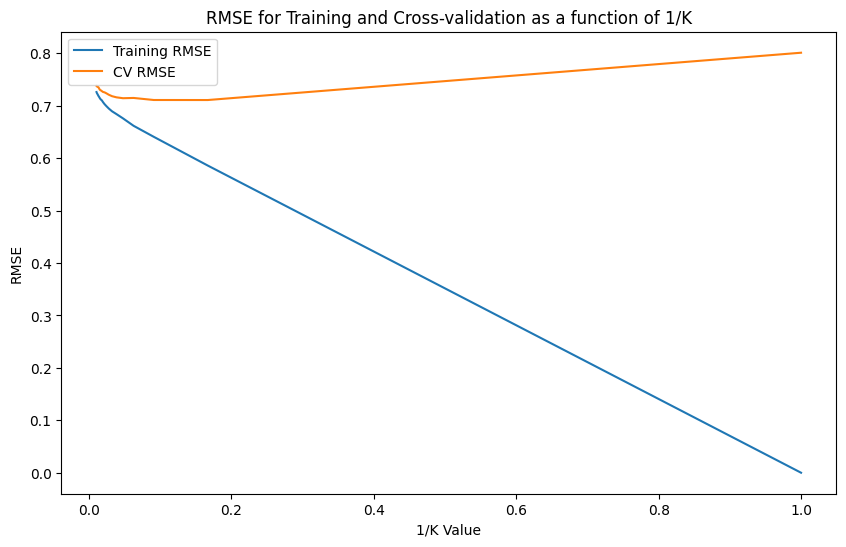

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(inverse_k_values, training_rmse, label='Training RMSE')
plt.plot(inverse_k_values, cv_rmse, label='CV RMSE')
plt.xlabel('1/K Value')
plt.ylabel('RMSE')
plt.title('RMSE for Training and Cross-validation as a function of 1/K')
plt.legend()
plt.show()


In [17]:
len(train)

3698

In [21]:
cv_rmse

[0.801223555049539,
 0.7109695899728206,
 0.7110268120799912,
 0.7149355033340514,
 0.7144409276569488,
 0.7161141455020402,
 0.7182927518360337,
 0.7210079884520062,
 0.723710903815533,
 0.7256151802750538,
 0.726348837469984,
 0.728039043149976,
 0.7295009870865735,
 0.7304741560592578,
 0.7329005638248234,
 0.7354192358394764,
 0.7358829041650428,
 0.7362969044038239,
 0.7369901652444736,
 0.7378612696640962]

In [ ]:
#Implement backward 